In [1]:
from maestro_pizza_maker.pizza_menu import PizzaMenu
from maestro_pizza_maker.pizza import Pizza
from maestro_pizza_maker.ingredients import PizzaIngredients
import maestro_pizza_maker.pizza_sensitivities

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from maestro_pizza_maker.pizza_sensitivities import (
    menu_sensitivity_protein,
    menu_sensitivity_carbs,
    menu_sensitivity_fat,
)

from maestro_pizza_maker.taste_at_risk import (
    taste_at_risk_menu,
    taste_at_risk_pizza,
    conditional_taste_at_risk_pizza,
    conditional_taste_at_risk_menu
)

from maestro_pizza_maker.pizza_optimizer import (
    minimize_price,
    maximize_taste_penalty_price,
    PizzaConstraintsValues,
    PizzaConstraintsIngredients
)

In [2]:
# consider following menu
pizza_menu = PizzaMenu(
    pizzas=[
        Pizza(
            sauce=PizzaIngredients.CREAM_SAUCE,
            dough=PizzaIngredients.CLASSIC_DOUGH,
            cheese=[PizzaIngredients.MOZZARELA],
            fruits=[PizzaIngredients.PINEAPPLE],
            meat=[PizzaIngredients.BACON, PizzaIngredients.HAM],
            vegetables=[PizzaIngredients.ONIONS],
        ),
        Pizza(
            sauce=PizzaIngredients.TOMATO_SAUCE,
            dough=PizzaIngredients.THIN_DOUGH,
            cheese=[PizzaIngredients.CHEDDAR],
            fruits=[PizzaIngredients.APPLE],
            meat=[PizzaIngredients.SAUSAGE],
            vegetables=[PizzaIngredients.MUSHROOMS, PizzaIngredients.PEPPER],
        ),
        Pizza(
            sauce=PizzaIngredients.CREAM_SAUCE,
            dough=PizzaIngredients.WHOLEMEAL_DOUGH,
            cheese=[PizzaIngredients.MOZZARELA, PizzaIngredients.CHEDDAR],
            fruits=[PizzaIngredients.PINEAPPLE, PizzaIngredients.APPLE],
            meat=[
                PizzaIngredients.BACON,
                PizzaIngredients.HAM,
                PizzaIngredients.SAUSAGE,
            ],
            vegetables=[
                PizzaIngredients.MUSHROOMS,
                PizzaIngredients.ONIONS,
                PizzaIngredients.PEPPER,
            ],
        ),
        Pizza(
            sauce=PizzaIngredients.TOMATO_SAUCE,
            dough=PizzaIngredients.CLASSIC_DOUGH,
            cheese=[PizzaIngredients.MOZZARELA],
            fruits=[PizzaIngredients.PINEAPPLE],
            meat=[PizzaIngredients.BACON, PizzaIngredients.HAM],
            vegetables=[PizzaIngredients.ONIONS],
        ),
        Pizza(
            sauce=PizzaIngredients.CREAM_SAUCE,
            dough=PizzaIngredients.THIN_DOUGH,
            cheese=[PizzaIngredients.CHEDDAR],
            fruits=[PizzaIngredients.APPLE],
            meat=[PizzaIngredients.SAUSAGE],
            vegetables=[PizzaIngredients.MUSHROOMS, PizzaIngredients.PEPPER],
        ),
        Pizza(
            sauce=PizzaIngredients.TOMATO_SAUCE,
            dough=PizzaIngredients.WHOLEMEAL_DOUGH,
            cheese=[PizzaIngredients.MOZZARELA, PizzaIngredients.CHEDDAR],
            fruits=[PizzaIngredients.PINEAPPLE, PizzaIngredients.APPLE],
            meat=[
                PizzaIngredients.BACON,
                PizzaIngredients.HAM,
                PizzaIngredients.SAUSAGE,
            ],
            vegetables=[
                PizzaIngredients.MUSHROOMS,
                PizzaIngredients.ONIONS,
                PizzaIngredients.PEPPER,
            ],
        ),
        Pizza(
            sauce=PizzaIngredients.CREAM_SAUCE,
            dough=PizzaIngredients.CLASSIC_DOUGH,
            cheese=[PizzaIngredients.MOZZARELA],
            fruits=[PizzaIngredients.PINEAPPLE],
            meat=[PizzaIngredients.BACON, PizzaIngredients.HAM],
            vegetables=[PizzaIngredients.ONIONS],
        ),
        Pizza(
            sauce=PizzaIngredients.TOMATO_SAUCE,
            dough=PizzaIngredients.THIN_DOUGH,
            cheese=[PizzaIngredients.CHEDDAR],
            fruits=[PizzaIngredients.APPLE],
            meat=[PizzaIngredients.SAUSAGE],
            vegetables=[PizzaIngredients.MUSHROOMS, PizzaIngredients.PEPPER],
        ),
        Pizza(
            sauce=PizzaIngredients.CREAM_SAUCE,
            dough=PizzaIngredients.WHOLEMEAL_DOUGH,
            cheese=[PizzaIngredients.MOZZARELA, PizzaIngredients.CHEDDAR],
            fruits=[PizzaIngredients.PINEAPPLE, PizzaIngredients.APPLE],
            meat=[
                PizzaIngredients.BACON,
                PizzaIngredients.HAM,
                PizzaIngredients.SAUSAGE,
            ],
            vegetables=[
                PizzaIngredients.MUSHROOMS,
                PizzaIngredients.ONIONS,
                PizzaIngredients.PEPPER,
            ],
        ),
        Pizza(
            sauce=PizzaIngredients.TOMATO_SAUCE,
            dough=PizzaIngredients.CLASSIC_DOUGH,
            cheese=[PizzaIngredients.MOZZARELA],
            fruits=[PizzaIngredients.PINEAPPLE],
            meat=[PizzaIngredients.BACON, PizzaIngredients.HAM],
            vegetables=[PizzaIngredients.ONIONS],
        ),
    ]
)


In [3]:
# create a dataframe with the menu using the to_dataframe method you have implemented in the PizzaMenu class
# and display it
df_pizza_menu = pizza_menu.to_dataframe(sort_by="price", descendent=False)
df_pizza_menu

,name,price,protein,average_fat,carbohydrates,calories,ingredients
1,"THIN DOUGH PIZZA, WITH CHEDDAR, APPLE, SAUSAGE...",6.5,45.5,29.802510,28.0,1070.0,"[THIN DOUGH, TOMATO SAUCE, CHEDDAR, APPLE, SAU..."
7,"THIN DOUGH PIZZA, WITH CHEDDAR, APPLE, SAUSAGE...",6.5,45.5,29.802510,28.0,1070.0,"[THIN DOUGH, TOMATO SAUCE, CHEDDAR, APPLE, SAU..."
4,"THIN DOUGH PIZZA, WITH CHEDDAR, APPLE, SAUSAGE...",6.6,45.6,29.742671,29.0,1080.0,"[THIN DOUGH, CREAM SAUCE, CHEDDAR, APPLE, SAUS..."
3,"CLASSIC DOUGH PIZZA, WITH MOZZARELA, PINEAPPLE...",7.5,60.5,26.863504,23.0,1820.0,"[CLASSIC DOUGH, TOMATO SAUCE, MOZZARELA, PINEA..."
9,"CLASSIC DOUGH PIZZA, WITH MOZZARELA, PINEAPPLE...",7.5,60.5,26.863504,23.0,1820.0,"[CLASSIC DOUGH, TOMATO SAUCE, MOZZARELA, PINEA..."
0,"CLASSIC DOUGH PIZZA, WITH MOZZARELA, PINEAPPLE...",7.6,60.6,26.803665,24.0,1830.0,"[CLASSIC DOUGH, CREAM SAUCE, MOZZARELA, PINEAP..."
6,"CLASSIC DOUGH PIZZA, WITH MOZZARELA, PINEAPPLE...",7.6,60.6,26.803665,24.0,1830.0,"[CLASSIC DOUGH, CREAM SAUCE, MOZZARELA, PINEAP..."
5,"WHOLEMEAL DOUGH PIZZA, WITH MOZZARELA, CHEDDAR...",12.5,95.5,28.705219,38.0,2770.0,"[WHOLEMEAL DOUGH, TOMATO SAUCE, MOZZARELA, CHE..."
2,"WHOLEMEAL DOUGH PIZZA, WITH MOZZARELA, CHEDDAR...",12.6,95.6,28.670313,39.0,2780.0,"[WHOLEMEAL DOUGH, CREAM SAUCE, MOZZARELA, CHED..."
8,"WHOLEMEAL DOUGH PIZZA, WITH MOZZARELA, CHEDDAR...",12.6,95.6,28.670313,39.0,2780.0,"[WHOLEMEAL DOUGH, CREAM SAUCE, MOZZARELA, CHED..."


In [4]:
# compute basic descriptive statistics for the menu.
df_pizza_menu.describe()

,price,protein,average_fat,carbohydrates,calories
count,10.00000,10.000000,10.000000,10.000000,10.000000
mean,8.75000,66.550000,28.272787,29.500000,1885.000000
std,2.67135,21.068737,1.317932,6.687468,697.316284
min,6.50000,45.500000,26.803665,23.000000,1070.000000
25%,6.82500,49.325000,26.863504,24.000000,1265.000000
50%,7.55000,60.550000,28.670313,28.000000,1825.000000
75%,11.27500,86.775000,29.483308,35.750000,2535.000000
max,12.60000,95.600000,29.802510,39.000000,2780.000000


In [5]:
percentiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
df_pizza_menu_price = df_pizza_menu['price']
skewness = df_pizza_menu_price.skew()
kurtosis = df_pizza_menu_price.kurtosis()

print(df_pizza_menu_price.describe(percentiles))
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")

count    10.00000
mean      8.75000
std       2.67135
min       6.50000
10%       6.50000
20%       6.58000
30%       7.23000
40%       7.50000
50%       7.55000
60%       7.60000
70%       9.07000
80%      12.52000
90%      12.60000
100%     12.60000
max      12.60000
Name: price, dtype: float64
Skewness: 0.9267
Kurtosis: -1.2613


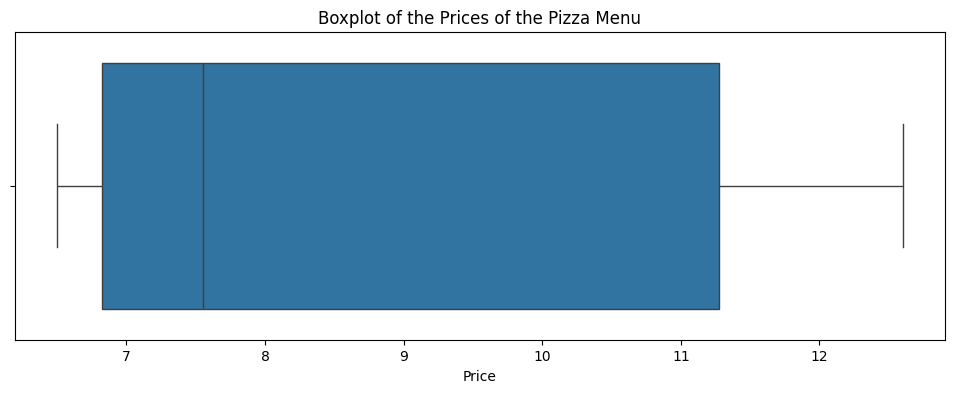

In [6]:
# pay a special attention to the price column, as it is the most important one

# Following steps are optional, but recommended:
# 1. Create a boxplot for the price column
plt.figure(figsize=(12, 4))
sns.boxplot(x='price', data=df_pizza_menu)
plt.title('Boxplot of the Prices of the Pizza Menu')
plt.xlabel('Price')
plt.show()

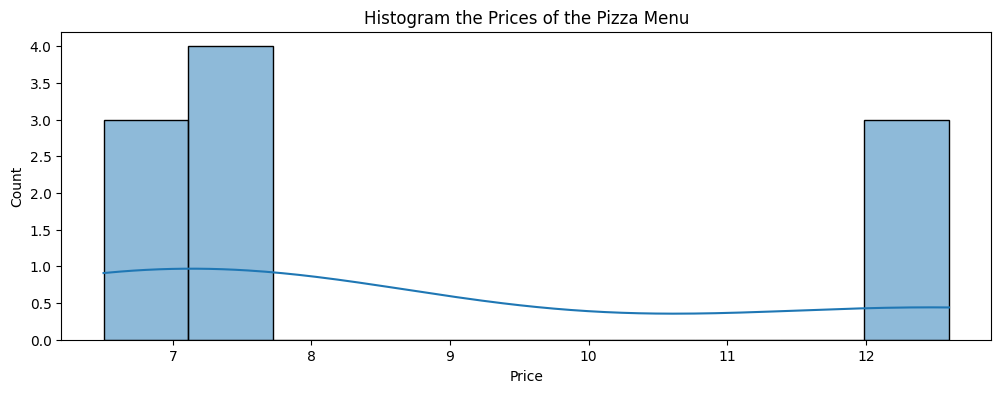

In [7]:
# 2. Create a histogram for the price column
plt.figure(figsize=(12, 4))
sns.histplot(df_pizza_menu['price'], kde=True, bins=10)
plt.title('Histogram the Prices of the Pizza Menu')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

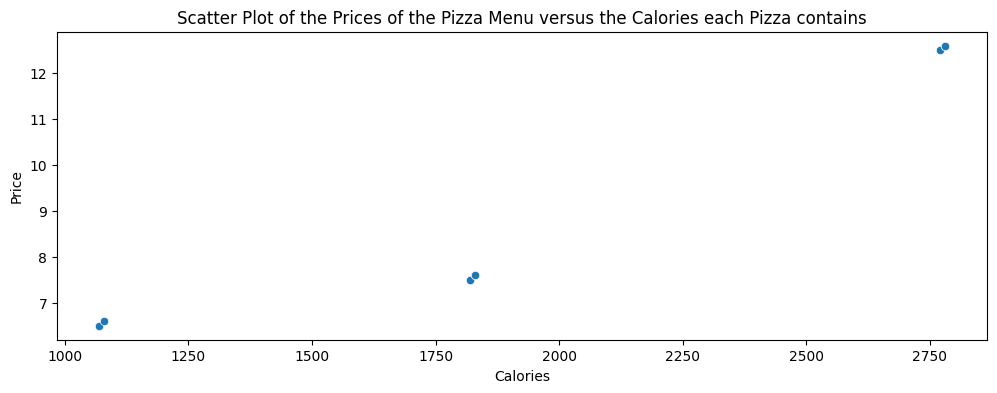

In [8]:
# 3. Create a scatter plot for the price column and any other column of your choice
plt.figure(figsize=(12, 4))
sns.scatterplot(x='calories', y='price', data=df_pizza_menu)
plt.title('Scatter Plot of the Prices of the Pizza Menu versus the Calories each Pizza contains')
plt.xlabel('Calories')
plt.ylabel('Price')
plt.show()

# We see that for those individuals that need to stack up on calories for gaining some muscle in the gym there is no preferable pizza and that increases in calories and increases in prices go hand in hand.

In [9]:
# Try to answer follwing question:
# 1. How much will price change on average if we increase the amount of protein in the pizza by 1 unit?
menu_sensitivity_protein(pizza_menu)

0.12536216919793994

In [10]:
# 2. How much will price change on average if we increase the amount of average_fat in the pizza by 1 unit?
menu_sensitivity_fat(pizza_menu)

0.09856100544599704

In [11]:
# 3. How much will price change on average if we increase the amount of carbohydrates in the pizza by 1 unit?
menu_sensitivity_carbs(pizza_menu)

0.35217391304347834

In [12]:
# Compute Taste at Risk (TaR) for each pizza in the menu and for the whole menu and briefly comment on the results
# Use quantile = 0.1
# Answer following question:
# 1. Does the sum of TaR for each pizza in the menu equal to the TaR of the whole menu and why?
# Hint: use functions that you have implemented in the taste_at_risk.py

quantile = 0.1
TaR_list = []
for pizza in pizza_menu.pizzas:
    TaR_list.append(taste_at_risk_pizza(pizza=pizza, quantile=quantile))

TaR_list = []
for pizza in pizza_menu.pizzas:
    TaR_list.append(taste_at_risk_pizza(pizza=pizza, quantile=quantile))

print("TaR of the individual pizzas in the menu: ", TaR_list)
print("Sum of the TaR of the individual pizzas in the menu: ", sum(TaR_list))

TaR_menu = taste_at_risk_menu(menu=pizza_menu, quantile=quantile)
print("TaR of the total menu: ", TaR_menu)

TaR of the individual pizzas in the menu:  [33.324878555401376, 27.950597148045482, 55.703131691047716, 33.373236450102894, 27.839955481749104, 55.76328769150705, 33.324878555401376, 27.950597148045482, 55.703131691047716, 33.373236450102894]
Sum of the TaR of the individual pizzas in the menu:  384.30693086245105
TaR of the total menu:  384.565214275717


In [13]:
# create a dataframe, where each of the columns is a different pizza, and the rows contain the values sampled from the taste distribution
taste_list = []
pizza_name_list = []
for pizza in pizza_menu.pizzas:
    taste_list.append(pizza.taste)
    pizza_name_list.append(pizza.name)

taste_arr = np.array(taste_list).T

df_menu = pd.DataFrame(taste_arr, columns=pizza_name_list)
corr_matrix = df_menu.corr()
print(corr_matrix)


                                                    CLASSIC DOUGH PIZZA, WITH MOZZARELA, PINEAPPLE, BACON, HAM, ONIONS AND CREAM SAUCE, UNIQUE ORDER KEY: e2c0bacbd5d83f6e  \
CLASSIC DOUGH PIZZA, WITH MOZZARELA, PINEAPPLE,...                                           1.000000                                                                        
THIN DOUGH PIZZA, WITH CHEDDAR, APPLE, SAUSAGE,...                                           0.942381                                                                        
WHOLEMEAL DOUGH PIZZA, WITH MOZZARELA, CHEDDAR,...                                           0.988859                                                                        
CLASSIC DOUGH PIZZA, WITH MOZZARELA, PINEAPPLE,...                                           0.992197                                                                        
THIN DOUGH PIZZA, WITH CHEDDAR, APPLE, SAUSAGE,...                                           0.955540                             

Answer:

From our results we see that the TaR of the total menu is only slightly higher than the sum of the TaR of the individual pizzas, and as higher taste values are better, we see that we are not really able to able to reap the benefits of diversification from our pizza menu, and that our pizzas seem to have very correlated tastes. 
To test this hypothesis, I plotted a simple correlation matrix above, where we can see that our pizzas are correlated.

In [14]:
# Compute Conditional Taste at Risk (CTaR) for each pizza in the menu and for the whole menu and briefly comment on the results

# Hint: use functions that you have implemented in the taste_at_risk.py
cTaR_list = []
for pizza in pizza_menu.pizzas:
    cTaR_list.append(conditional_taste_at_risk_pizza(pizza=pizza, quantile=quantile))
print("cTaR of the individual pizzas in the menu: ", cTaR_list)
print("Sum of the cTaR of the individual pizzas in the menu: ", sum(cTaR_list))

cTaR_menu = conditional_taste_at_risk_menu(menu=pizza_menu, quantile=quantile)
print("cTaR of the total menu: ", cTaR_menu)

# Comment on Results:
# The first comment is that we see our cTaR calculations spit out values that are much lower than our TaR calculations (which means that we expect more risk), and this is expected as cTaR is a much more conservative estimate of risk that can give a better estimation of the tail risks than TaR.
# The second comment that we see here is that the cTaR of the menu is also slightly higher than the cTaR of the pizza due to the diversification effects discussed above. 

cTaR of the individual pizzas in the menu:  [31.944859784168216, 26.665836345254217, 53.405822863915425, 32.055982521198274, 26.567580401198224, 53.49779228246962, 31.944859784168216, 26.665836345254217, 53.405822863915425, 32.055982521198274]
Sum of the cTaR of the individual pizzas in the menu:  368.2103757127401
cTaR of the total menu:  368.655954183209


In [15]:
# Define constraints_values and constraints_ingredients and find the optimal pizza using the func maximize_taste_penalty_price, that you have implemented in the pizza_optimizer.py
# Use lambda_param = 0.5
lambda_param = 0.5

pizza_ingredients = [ingredient for ingredient in PizzaIngredients]

constraints_values = PizzaConstraintsValues()
constraints_ingredients = PizzaConstraintsIngredients()

optimal_pizza = maximize_taste_penalty_price(
    constraints_values,
    constraints_ingredients,
    lambda_param
) 

Welcome to the CBC MILP Solver 
Version: Trunk
Build Date: Oct 24 2021 

Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 12 small elements
Coin0506I Presolve 0 (-14) rows, 0 (-16) columns and 0 (-132) elements
Clp0000I Optimal - objective value -0.34506728
Coin0511I After Postsolve, objective -0.34506728, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective -0.3450672828 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00

Starting MIP optimization
Cgl0002I 11 variables fixed
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cgl0015I Clique Strengthening extended 0 cliques, 0 were dominated
Cbc3007W No integer variables
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00



In [16]:
print("The optimal pizza contains the following ingredients:")
for ingredients in optimal_pizza.ingredients:
    print(ingredients)

print("\nThe optimal pizza has the following expected taste: ", np.mean(optimal_pizza.taste))
print("The optimal pizza has the following expected price: ", optimal_pizza.price)
print("The optimal pizza has the following taste to price ratio: ", np.mean(optimal_pizza.taste)/optimal_pizza.price)
# Conclusion is that this pizza is definitely not very tasty, but it is indeed very cheap

# Add this pizza to the menu using the add_pizza method of the PizzaMenu class
pizza_menu.add_pizza(optimal_pizza)

The optimal pizza contains the following ingredients:
PizzaIngredients.THIN_DOUGH
PizzaIngredients.TOMATO_SAUCE

The optimal pizza has the following expected taste:  6.478923474404538
The optimal pizza has the following expected price:  1.5
The optimal pizza has the following taste to price ratio:  4.319282316269692


In [17]:
#Let's do a sanity check on the other pizzas in the menu:
for pizza in pizza_menu.pizzas:
    print("\nThe pizza has the following expected taste: ", np.mean(pizza.taste))
    print("The pizza has the following expected price: ", pizza.price)
    print("The pizza has the following taste to price ratio: ", np.mean(pizza.taste)/pizza.price)


The pizza has the following expected taste:  36.572205419076894
The pizza has the following expected price:  7.6
The pizza has the following taste to price ratio:  4.8121322919838025

The pizza has the following expected taste:  30.81013098690554
The pizza has the following expected price:  6.5
The pizza has the following taste to price ratio:  4.740020151831621

The pizza has the following expected taste:  61.14836140821031
The pizza has the following expected price:  12.6
The pizza has the following taste to price ratio:  4.853044556207168

The pizza has the following expected taste:  36.655980219384254
The pizza has the following expected price:  7.5
The pizza has the following taste to price ratio:  4.887464029251234

The pizza has the following expected taste:  30.726356186598174
The pizza has the following expected price:  6.6
The pizza has the following taste to price ratio:  4.655508513120936

The pizza has the following expected taste:  61.23213620851768
The pizza has the fol

In [18]:
# Compute the new TaR and CTaR for the whole new menu with added pizza
TaR_menu_new = taste_at_risk_menu(menu=pizza_menu, quantile=quantile)
print("TaR of the total menu: ", TaR_menu)

cTaR_menu_new = conditional_taste_at_risk_menu(menu=pizza_menu, quantile=quantile)
print("cTaR of the total menu: ", cTaR_menu)

TaR of the total menu:  384.565214275717
cTaR of the total menu:  368.655954183209


In [19]:
taste_list = []
pizza_name_list = []
for pizza in pizza_menu.pizzas:
    taste_list.append(pizza.taste)
    pizza_name_list.append(pizza.name)

taste_arr = np.array(taste_list).T

df_menu = pd.DataFrame(taste_arr, columns=pizza_name_list)
corr_matrix = df_menu.corr()
print(corr_matrix)

                                                    CLASSIC DOUGH PIZZA, WITH MOZZARELA, PINEAPPLE, BACON, HAM, ONIONS AND CREAM SAUCE, UNIQUE ORDER KEY: d662b2b2f97e19d2  \
CLASSIC DOUGH PIZZA, WITH MOZZARELA, PINEAPPLE,...                                           1.000000                                                                        
THIN DOUGH PIZZA, WITH CHEDDAR, APPLE, SAUSAGE,...                                           0.942381                                                                        
WHOLEMEAL DOUGH PIZZA, WITH MOZZARELA, CHEDDAR,...                                           0.988859                                                                        
CLASSIC DOUGH PIZZA, WITH MOZZARELA, PINEAPPLE,...                                           0.992197                                                                        
THIN DOUGH PIZZA, WITH CHEDDAR, APPLE, SAUSAGE,...                                           0.955540                             

In [21]:
# Compare old and new TaR and CTaR and briefly comment on the results.
delta_TaR = TaR_menu_new - TaR_menu
print("difference in the TaR is: ", delta_TaR)
delta_cTaR = cTaR_menu_new - cTaR_menu
print("difference in the cTaR is: ", delta_cTaR)

# Comment on Results:
# From our basic correlation analysis we see that the most optimal pizza has a slightly lower correlation with the other pizzas in the menu, therefore we should expect to see the diversification effects in the pizza menu to increase,
# and this is indeed the case, for both the TaR and the cTar
# We also see that the cTaR is once again lower than the TaR, which is an expected results

difference in the TaR is:  5.828653909348077
difference in the cTaR is:  5.596484394160086
